In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [8]:
df = pd.read_csv("PEMF+SPP_for_train.csv")
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values
df

,0,1,2,3,4,5,6,7,8,9,...,252,253,254,255,256,257,258,259,260,yield
0,0,0,1,1,0,1,1,0,0,1,...,0,0,1,0,1,0,0,-30.575253,-0.213764,10.657812
1,0,0,1,1,0,1,1,0,0,1,...,0,0,1,0,1,0,0,-73.591857,-0.213764,14.747896
2,0,0,1,1,0,1,1,0,0,1,...,0,0,1,0,1,0,0,-135.788604,-0.213764,18.278686
3,0,0,1,1,0,1,1,0,0,1,...,0,0,1,0,1,0,1,-26.232769,-0.213764,2.475058
4,0,0,1,1,0,1,1,0,0,1,...,0,0,1,0,1,0,1,-60.855900,-0.213764,6.119058
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4127,1,0,0,1,1,1,0,0,1,1,...,1,1,0,1,1,1,1,-161.008607,-0.152115,57.426670
4128,1,0,0,1,1,1,0,0,1,1,...,1,1,0,1,1,1,1,-386.774319,-0.152115,86.233157
4129,1,0,0,1,1,1,0,0,1,1,...,1,1,0,1,1,0,0,-1.428639,-0.152115,1.440081
4130,1,0,0,1,1,1,0,0,1,1,...,1,1,0,1,1,0,0,-43.931724,-0.152115,43.538365


In [141]:
from sklearn.model_selection import train_test_split, KFold
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from tqdm import tqdm
kf = KFold(n_splits=10, shuffle=True, random_state=42)
rf = RandomForestRegressor(n_estimators=885, max_depth=46, random_state=42)
rmse_scores = []
r2_scores = []
seed = []
for train_index, test_index in tqdm(kf.split(X, y), total=kf.n_splits, desc='Model training'):
    model = rf.fit(X[train_index], y[train_index])
    y_pred = model.predict(X[test_index])
    r2_scores.append(r2_score(y[test_index], y_pred))
    rmse_scores.append(np.sqrt(mean_squared_error(y[test_index], y_pred)))
tqdm.write("Model training Completed")

Model training: 100%|██████████████████████████████████████████████████████████████████| 10/10 [06:36<00:00, 39.64s/it]

Model training Completed


In [144]:
print(np.mean(r2_scores))
print(np.mean(rmse_scores))

0.9430543724107094
6.471441884575022


In [146]:
df1 = pd.read_csv('reaction_features_for_predict.csv')
X = df1.values
df1

,0,1,2,3,4,5,6,7,8,9,...,251,252,253,254,255,256,257,258,259,260
0,1,0,0,1,1,1,0,0,1,1,...,1,0,0,0,1,0,0,0,-132.277670,-0.35922
1,1,0,0,1,1,1,0,0,1,1,...,1,0,0,0,1,0,0,0,-162.516771,-0.35922


In [147]:
model.predict(X)

array([47.04606378, 87.23407454])

In [149]:
from rdkit import Chem
df2 = pd.read_csv('Buchwald.csv')
df2[df2['aryl'] == Chem.MolToSmiles(Chem.MolFromSmiles('C(OC)1=CC=C(I)C=C1'))].iloc[ :, -1].describe()

count    276.000000
mean      31.424390
std       18.333926
min        0.000000
25%       14.636293
50%       35.598182
75%       47.068983
max       68.248127
Name: yield, dtype: float64

In [151]:
df2[df2['aryl'] == Chem.MolToSmiles(Chem.MolFromSmiles('C1=CC(OC)=CC=C1I'))].iloc[ :, -1].describe()

count    276.000000
mean      31.424390
std       18.333926
min        0.000000
25%       14.636293
50%       35.598182
75%       47.068983
max       68.248127
Name: yield, dtype: float64

In [174]:
df2['ligand'].unique()[2]

'CC(C)C1=CC(C(C)C)=CC(C(C)C)=C1C2=C(P(C(C)(C)C)C(C)(C)C)C(OC)=CC=C2OC'

In [184]:
df3 = df2[df2['aryl'] == Chem.MolToSmiles(Chem.MolFromSmiles('C1=CC(OC)=CC=C1I'))]
df4 = df3[df3['additive'] == Chem.MolToSmiles(Chem.MolFromSmiles('N1=C(C(=O)OCC)C=C(C)O1'))]
df5 = df4[df4['base'] == Chem.MolToSmiles(Chem.MolFromSmiles('CN1CCCN2CCCN=C12'))]
df5

,base,ligand,aryl,additive,product,yield
125,CN1CCCN2CCCN=C12,CC(C)C1=CC(C(C)C)=CC(C(C)C)=C1C2=C(P(C3CCCCC3)...,COc1ccc(I)cc1,CCOC(=O)c1cc(C)on1,COc1ccc(Nc2ccc(C)cc2)cc1,26.963544
260,CN1CCCN2CCCN=C12,CC(C)C(C=C(C(C)C)C=C1C(C)C)=C1C2=CC=CC=C2P(C(C...,COc1ccc(I)cc1,CCOC(=O)c1cc(C)on1,COc1ccc(Nc2ccc(C)cc2)cc1,49.927400
395,CN1CCCN2CCCN=C12,CC(C)C1=CC(C(C)C)=CC(C(C)C)=C1C2=C(P(C(C)(C)C)...,COc1ccc(I)cc1,CCOC(=O)c1cc(C)on1,COc1ccc(Nc2ccc(C)cc2)cc1,45.982116
530,CN1CCCN2CCCN=C12,CC(C1=C(C2=C(OC)C=CC(OC)=C2P(C34CC5CC(C4)CC(C5...,COc1ccc(I)cc1,CCOC(=O)c1cc(C)on1,COc1ccc(Nc2ccc(C)cc2)cc1,55.012232


-132.2776696635792
yield:99%


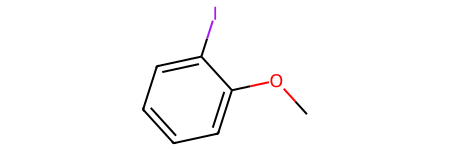

In [177]:
from mordred import Autocorrelation
from rdkit import Chem
AATSC = Autocorrelation.AATSC(order=4, prop='m')
MATS = Autocorrelation.MATS(order=5, prop='s')
print(AATSC(Chem.MolFromSmiles('C1=CC=C(I)C(OC)=C1')))
print('yield:99%')
Chem.MolFromSmiles('C1=CC=C(I)C(OC)=C1')